In [1]:
import cv2
import os
from PIL import Image
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

**Detecting Face on Single Image**

1/1 [==============================] - 0s 147ms/step


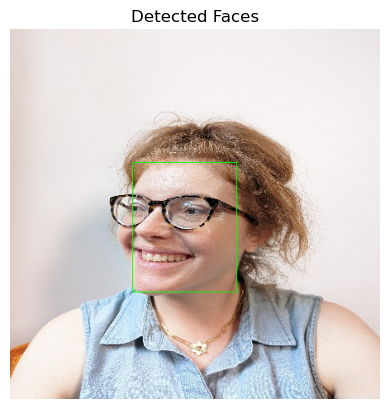

In [5]:
# Load an image
# image_path = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_0\\PXL_20220922_132845778.PORTRAIT.jpg'
image_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized\\1_PXL_20220922_162919912.jpg'

# Destination Folder
# destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB for matplotlib

# Create MTCNN detector
detector = MTCNN()

# Detect faces
faces = detector.detect_faces(image)

# Draw bounding boxes on the image
for face in faces:
    bounding_box = face['box']
    cv2.rectangle(
        image_rgb,
        (bounding_box[0], bounding_box[1]),
        (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
        (0, 255, 0),  # BGR color format: Green color
        1  # Thickness of the rectangle
    )

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.title('Detected Faces')
plt.show()

**Extracting All Face to seperate Folder**

In [2]:
# Load an image
# source_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst-e_data\\subject_0\\PXL_20220922_132845778.PORTRAIT.jpg' change this to resized folder directory
source_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized'

# Destination Folder
# destination_directory = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst-e_data\\mst_faces'
destination_directory = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'

# Create destination Folder if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Create MTCNN detector
detector = MTCNN()

# Iterate through each file in the source directory
for filename in os.listdir(source_directory):
    image_path = os.path.join(source_directory, filename)

    # Ensure the file is an image (you can add more specific image formats if needed)
    if os.path.isfile(image_path) and any(image_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
        image = cv2.imread(image_path)

        # Detect faces
        faces = detector.detect_faces(image)

        # Extracting Face to folder
        if len(faces) > 0:
            largest_face = max(faces, key=lambda f: f['box'][2] * f['box'][3])
            x, y, w, h = largest_face['box']

            min_face_size = 30
            if w > min_face_size and h > min_face_size:
                face = image[y:y + h, x:x + w]

                extracted_face_filename = f'{os.path.splitext(filename)[0]}.jpg'
                extracted_face_path = os.path.join(destination_directory, extracted_face_filename)

                cv2.imwrite(extracted_face_path, face)
            else:
                print(f"Face in {filename} is too small and will be skipped.")
        else:
            
            print(f"No face detected in {filename}.")

print("Face extraction complete!")


1/1 [==============================] - 0s 19ms/step
No face detected in 10_poorly_lit_PXL_20220922_175717675.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_poorly_lit_PXL_20220922_175816268.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_poorly_lit_PXL_20220922_175827000.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_poorly_lit_PXL_20220922_175834037.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_poorly_lit_PXL_20220922_175841186.jpg.
1/1 [==============================] - 0s 19ms/step
No face detected in 10_poorly_lit_PXL_20220922_175844972.jpg.
1/1 [==============================] - 0s 19ms/step
No face detected in 10_poorly_lit_PXL_20220922_175846375.jpg.
1/1 [==============================] - 0s 19ms/step
No face detected in 10_poorly_lit_PXL_20220922_175848809.jpg.
1/1 [==============================] - 0s 20ms/step
No face detected in 10_poorly_lit_PX

Resizing Face Images 

In [3]:
def resize_images(input_folder, output_folder, target_size):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
 
    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image (you can add more specific image formats if needed)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                # Open the image file
                image_path = os.path.join(input_folder, filename)
                with Image.open(image_path) as img:
                    # Resize the image
                    resized_img = img.resize(target_size, Image.LANCZOS)

                    # Save the resized image to the output folder
                    output_path = os.path.join(output_folder, filename)
                    resized_img.save(output_path)
                    print(f"Resized and saved: {filename}")
            except Exception as e:
                print(f"Error resizing {filename}: {e}")

if __name__ == "__main__":
    # Set input and output folders and target size
    input_folder = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces'
    output_folder = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_faces_resized'
    # input_folder = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces\\mst_faces'
    # output_folder = 'C:\\NUST\\7th Semester\\Computer Vision\\CV proj\\mst_faces_resized'
    
    target_size = (224, 224)  # Set the target size (width, height)

    # Resize images in the input folder and save to the output folder
    resize_images(input_folder, output_folder, target_size)

Resized and saved: 10_poorly_lit_PXL_20220922_175703876.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175705794.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175707910.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175709463.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175710848.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175712230.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175713987.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175715255.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175716367.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175718926.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175722948.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175724422.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175725538.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175726916.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175728401.jpg
Resized and saved: 10_poorly_lit_PXL_20220922_175732630.jpg
Resized and saved: 10_poorly_lit_PXL_202